In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
# Load Dataset
df = pd.read_csv("random_forest_dataset.csv")
print(df.head())



   Age  Salary     Education  Gender Purchased
0   56   21920  Postgraduate    Male       Yes
1   69  126121      Graduate    Male        No
2   46   97219      Graduate  Female       Yes
3   32   96872      Graduate  Female       Yes
4   60  101132      Graduate    Male        No


In [4]:
# Encode categorical columns
label_encoders = {}
categorical_cols = ['Education', 'Gender', 'Purchased']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Define features and target
X = df.drop("Purchased", axis=1)
y = df["Purchased"]



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=48)
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)# Predictions
y_pred = rf.predict(X_test)
# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48      1505
           1       0.48      0.48      0.48      1495

    accuracy                           0.48      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.48      0.48      0.48      3000



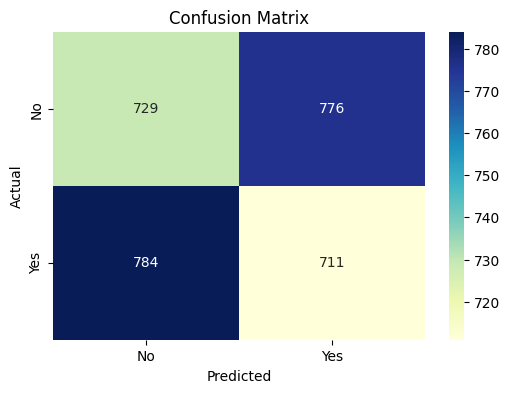

In [8]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=['No', 'Yes'],
    yticklabels=['No', 'Yes']
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


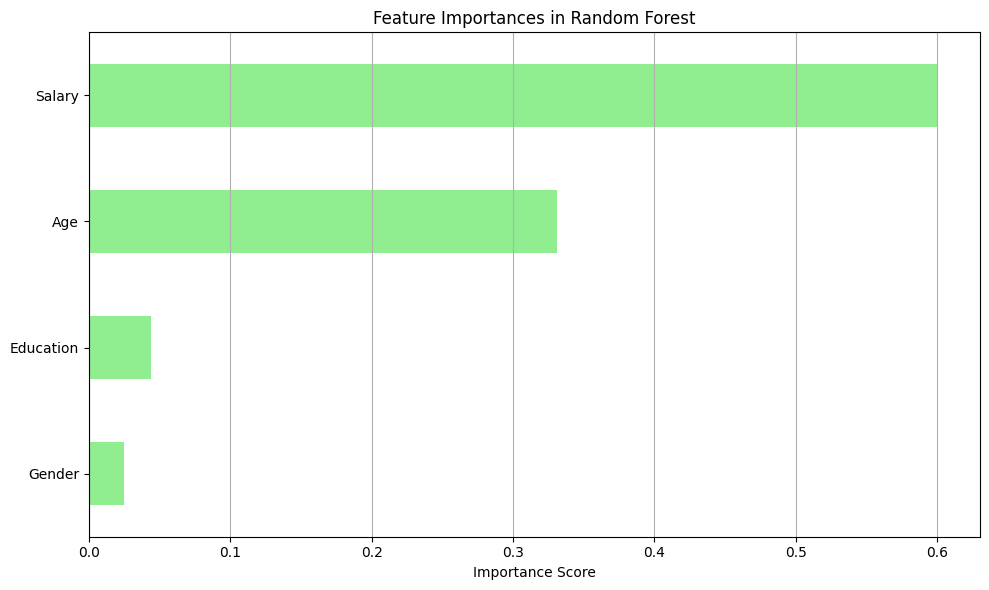

In [21]:
# Feature Importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_imp.plot(kind='barh', color='lightgreen')
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


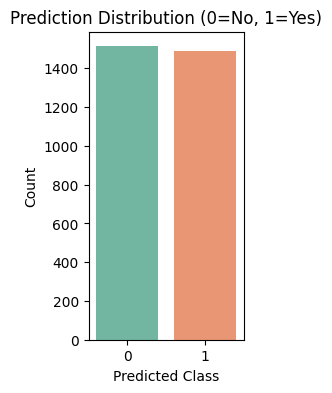

In [10]:
# Distribution of Predictions
plt.figure(figsize=(2, 4))
sns.countplot(x=y_pred, hue=y_pred, palette='Set2', legend=False)
plt.title("Prediction Distribution (0=No, 1=Yes)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


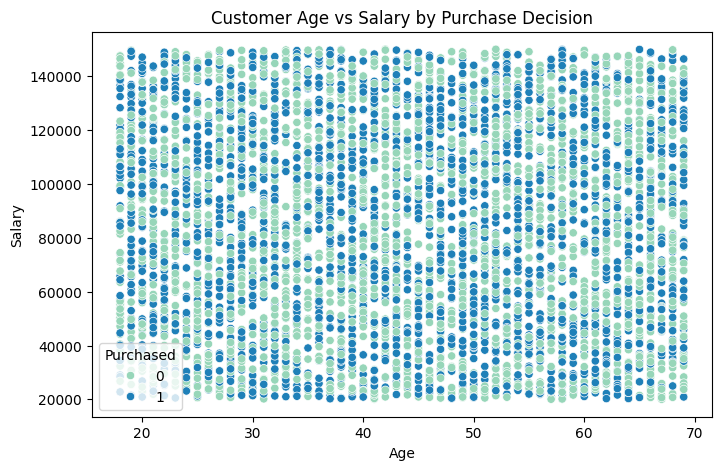

In [24]:
# Optional: Age vs Salary Scatter Plot by Purchase Decision
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Purchased', palette='YlGnBu')
plt.title("Customer Age vs Salary by Purchase Decision")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(title='Purchased')
plt.show()
